`````{note}
This project was adapted from a tutorial on Open Catalyst Project Models as part of a ClimateChangeAI tutorial available here:
https://colab.research.google.com/drive/1oGZcrakB4Pbj8Xq74lSvcRDUHw9L-Dh5?usp=sharing#scrollTo=FIiwpALzBKaH

Prof. Ulissi was one of the authors of that tutorial, and the tutorial was released openly under an MIT license. This modified content is released under the CC-by-4 license in the main repository.

Full list of contributing authors to the original tutorial:
* [Muhammed Shuaibi](https://mshuaibii.github.io/), CMU, mshuaibi@andrew.cmu.edu
* [Abhishek Das](https://abhishekdas.com/), FAIR, abhshkdz@fb.com 
* [Adeesh Kolluru](https://adeeshkolluru.github.io/), CMU, akolluru@andrew.cmu.edu
* [Brandon Wood](https://wood-b.github.io/), NERSC, bwood@lbl.gov 
* [Janice Lan](https://www.linkedin.com/in/janice-lan), FAIR, janlan@fb.com
* [Anuroop Sriram](https://www.linkedin.com/in/anuroopsriram), FAIR, anuroops@fb.com
* [Zachary Ulissi](https://ulissigroup.cheme.cmu.edu/), CMU, zulissi@andrew.cmu.edu
* [Larry Zitnick](http://larryzitnick.org/), FAIR, zitnick@fb.com
`````

![OC20 ask](./oc20_tasks.png)

# Using ML to Predict Catalyst Properties

Prof. Ulissi works on building computational datasets and machine learning models to predict the activity and selectivity of catalysts for various types of reactions. Many of these reactions are for renewable energy applications like hydrogen production, turning CO$_2$ into more valuable products, etc. The underlying simulations use quantum mechanical calculations (like you're learning about in your molecular foundations of ChE course), each of which is very slow. There are now many machine learning models (mostly graph neural networks) that can directly predict properties of these simulations. However, these models work much better for some catalyst surfaces and adsorbates than others, and we want your help in finding out how and when to trust these predictions!


`````{note}
**Catalyst dataset summary:**
* 2 CSV files (val_ID_compositions.csv, val_OOD_cat_compositions.csv)
    * val_ID_compositions.csv contains ~25,000 chemical compositions and energies from the OC20 validation split most similar to the training data set. This is probably what you should use for your train/validation splits)
    * val_OOD_cat_Compositions.csv contains ~25,000 compositions and energies from a different distribution of catalysts with similar adsorbates but different chemical composition combinations from the above file. For example, CuPt and CuPd combinations might exist in val_id_compositions.csv, but don't exist in val_OOD_cat_compositions.csv. 
* Each data point contains input features like chemical composition and other information about the surface and adsorbates. It also contains outputs for the actual DFT (simulation) energy, as well as predictions from two different machine learning models. 
`````

## Suggested challenges
* Given the bulk composition (chemical elements and their ratios) and the adsorbate composition (number of each type of atoms), predict the the DFT energies
* Given the bulk composition (chemical elements and their ratios) and the adsorbate composition (number of each type of atoms), predict the difference between one of ML models and the DFT energies. 
* Analyze the most important features from above to figure out which elements are hardest or eastiest to fit. 

````{note}
In each case, you should think critically about the question how you want to set up your train/validation/test splits to simulate the challenge. 
* What do you expect to be correlated?
* How would you know if your model is helpful?
* Is there any way to cheat at the task? 
````

## Dataset/file format details

Two csv files (`val_*.csv`) that together contain ~60,000 DFT energies and predictions using two different types of graph neural networks:       
* `arbitrary number` (disregard the first column)
* `random_id`: a unique identifier for each simulation structure, useful in the mappings below
* `output_DFT_energy`: the ground truth label,  units of [eV]
* `output_gemnet_direct`: energies from a fast direct graph neural network model, units of [eV]
* `output_gemnet_relaxation`: energies from a slower relaxation graph neural network model, units of [eV]
* `input_bulk_mpid` : Materials Project ID of the bulk system used corresponding the the catalyst surface
* `input_bulk_symbols`  Chemical composition of the bulk counterpart
* `input_ads_symbols`  Chemical composition of the adsorbate counterpart
* `input_miller_index`: 3-tuple of integers indicating the Miller indices of the surface
* `input_shift`: c-direction shift used to determine cutoff for the surface (c-direction is following the nomenclature from Pymatgen)
* `input_top`: boolean indicating whether the chosen surface was at the top or bottom of the originally enumerated surface
* `input_class`: integer indicating the class of materials the system's slab is part of, where:
    * 0 - intermetallics
    * 1 - metalloids
    * 2 - non-metals
    * 3 - halides
* `input_anomaly`: integer indicating possible anomalies (based off general heuristics, not to be taken as perfect classifications), where:
    * 0 - no anomaly
    * 1 - adsorbate dissociation
    * 2 - adsorbate desorption
    * 3 - surface reconstruction
    * 4 - incorrect CHCOH placement, appears to be CHCO with a lone, uninteracting, H far off in the unit cell

## Data availability

https://github.com/ulissigroup/F22-06-325/tree/main/f22-06-325/projects/catalysts/data

## Background:

Scalable and cost-effective solutions to renewable energy storage are essential to addressing the world’s rising energy needs while reducing climate change. As illustrated in the figure below, as we increase our reliance on renewable energy sources such as wind and solar, which produce intermittent power, storage is needed to transfer power from times of peak generation to peak demand. This may require the storage of power for hours, days, or months. One solution that offers the potential of scaling to nation-sized grids is the conversion of renewable energy to other fuels, such as hydrogen. To be widely adopted, this process requires cost-effective solutions to running chemical reactions.

An open challenge is finding low-cost catalysts to drive these reactions at high rates. Through the use of quantum mechanical simulations (Density Functional Theory, DFT), new catalyst structures can be tested and evaluated. Unfortunately, the high computational cost of these simulations limits the number of structures that may be tested. The use of AI or machine learning may provide a method to efficiently approximate these calculations; reducing the time required from 24} hours to a second. This capability would transform the search for new catalysts from the present day practice of evaluating O(1,000) of handpicked candidates to the brute force search over millions or even billions of candidates.

As part of OCP, we publicly released the world's largest quantum mechanical simulation dataset -- [OC20](https://github.com/Open-Catalyst-Project/ocp/blob/master/DATASET.md) -- in the Fall of 2020 along with a suite of baselines and evaluation metrics. The creation of the dataset required over 70 million hours of compute. This dataset enables the exploration of techniques that will generalize across different catalyst materials and adsorbates. If successful, models trained on the dataset could enable the computational testing of millions of catalyst materials for a wide variety of chemical reactions. However, techniques that achieve the accuracies required** for practical impact are still beyond reach and remain an open area for research, thus encouraging research in this important area to help in meeting the world's energy needs in the decades ahead.

** The computational catalysis community often aims for an adsorption energy MAE of 0.1-0.2 eV for practical relevance.

![California energy demand](./california_demand.jpg)

The discovery of efficient and economic catalysts (materials) are needed to enable the widespread use of renewable energy technologies. A common approach in discovering high performance catalysts is using molecular simulations. Specifically, each simulation models the interaction of a catalyst surface with molecules that are commonly seen in electrochemical reactions. By predicting these interactions accurately, the catalyst's impact on the overall rate of a chemical reaction may be estimated.

An important quantity in screening catalysts is their adsorption energy for the molecules, referred to as `adsorbates', involved in the reaction of interest. The adsorption energy may be found by simulating the interaction of the adsorbate molecule on the surface of the catalyst to find their resting or relaxed energy, i.e., how tightly the adsorbate binds to the catalyst's surface (visualized below). The rate of the chemical reaction, a value of high practical importance, is then commonly approximated using simple functions of the adsorption energy. The goal of this tutorial specifically and the project overall is to encourage research and benchmark progress towards training ML models to approximate this relaxation.

Specifically, during the course of a relaxation, given an initial set of atoms and their positions, the task is to iteratively estimate atomic forces and update atomic positions until a relaxed state is reached. The energy corresponding to the relaxed state is the structure's 'relaxed energy'. The relaxed energy is very useful for predicting the activity of a catalyst surface!

`````{seealso}
To gain an even better understanding of the Open Catalyst Project and the problems it seeks to address, you can read the following resources:
* Open Catalyst codebase: https://github.com/Open-Catalyst-Project/ocp/
* Open Catalyst webpage: https://opencatalystproject.org/
* [Electrocatalysis white paper](https://arxiv.org/pdf/2010.09435.pdf): C. Lawrence Zitnick, Lowik Chanussot, Abhishek Das, Siddharth Goyal, Javier Heras-Domingo, Caleb Ho, Weihua Hu, Thibaut Lavril, Aini Palizhati, Morgane Riviere, Muhammed Shuaibi, Anuroop Sriram, Kevin Tran, Brandon Wood, Junwoong Yoon, Devi Parikh, Zachary Ulissi: “An Introduction to Electrocatalyst Design using Machine Learning for Renewable Energy Storage”, 2020; arXiv:2010.09435.
* [OC20 dataset paper](https://arxiv.org/pdf/2010.09990.pdf): L. Chanussot, A. Das, S. Goyal, T. Lavril, M. Shuaibi, M. Riviere, K. Tran, J. Heras-Domingo, C. Ho, W. Hu, A. Palizhati, A. Sriram, B. Wood, J. Yoon, D. Parikh, C. L. Zitnick, and Z. Ulissi. The Open Catalyst 2020 (oc20) dataset and community challenges. ACS Catalysis, 2021.
* [Gemnet model:](https://arxiv.org/abs/2106.08903) Johannes Klicpera, Florian Becker, and Stephan Günnemann. Gemnet: Universal directional graph neural networks for molecules, 2021.
`````

## Hints and possible approaches

## Example Model

First, let's load the data using pandas and see what's in it!

In [1]:
import pandas as pd

df = pd.read_csv("data/val_ID_compositions.csv").dropna()
df

,Unnamed: 0,random_id,DFT_energy,output_gemnet_direct,output_gemnet_relaxation,input_bulk_mpid,input_bulk_symbols,input_ads_symbols,input_miller_index,input_shift,input_top,input_class,input_anomaly
0,0,random1700380,-0.401909,-0.752441,-0.288818,mp-990232,MnAu4,*NHNH,"(1, 0, 0)",0.051,True,0,0
1,1,random2320054,-3.992470,-4.183594,-4.175781,mp-1215213,ZrTaCr4,*CH2CH3,"(1, 1, 0)",0.063,False,0,0
2,2,random662687,0.920258,0.885742,-4.375000,mp-1216946,Ti4Mn4Cr4,*OHNH2,"(1, 0, 0)",0.123,True,0,0
4,4,random1507405,-0.051427,-0.170898,-0.117676,mp-1215529,ZnCu3,*OH,"(2, 1, -2)",0.084,True,0,0
5,5,random886089,-0.449791,-0.464844,-0.573242,mp-1094140,Mn2Ge4,*COHCH2OH,"(2, 1, 0)",0.020,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,24932,random1517480,-0.281488,-0.250977,-0.283447,mp-11445,Ti2Ga4Y,*N2,"(2, 1, 0)",0.048,False,0,0
24933,24933,random2249470,-4.604939,-4.667969,-4.585938,mp-30572,Ga2Hf4,*COCH2O,"(1, 1, 2)",0.000,True,0,0
24936,24936,random1460094,-3.683650,-3.271484,-3.548828,mp-607138,Sc20Bi12,*O,"(0, 2, 1)",0.010,True,0,0
24939,24939,random1471951,-1.612726,-1.057617,-1.650391,mp-1017531,V2Pt2,*CH2*O,"(2, 1, 1)",0.500,True,0,0


These formats are not very helpful. Let's try calculating the ratio of each element (one column for each unique element in the dataset)

In [2]:
import re


def composition_to_elements(composition):
    # Helper function to convert a composition like MnAu4 to a
    # dictionary like {'Mn': 1, 'Au': 4}
    elements = {}
    for k, v in re.findall(r"([A-Z][a-z]*)(\d*)", composition):
        if v == "":
            v = 1
        if k in elements:
            elements[k] += int(v)
        else:
            elements[k] = int(v)
    return elements


bulk_element_counts = (
    df["input_bulk_symbols"].apply(composition_to_elements).apply(pd.Series).fillna(0)
)
bulk_element_ratios = bulk_element_counts.div(bulk_element_counts.sum(axis=1), axis=0)
bulk_element_ratios

,Mn,Au,Zr,Ta,Cr,Ti,Zn,Cu,Ge,Sn,...,N,Sb,Rb,Bi,C,Hg,Re,H,Cs,B
0,0.200000,0.8,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.166667,0.166667,0.666667,0.000000,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.333333,0.0,0.000000,0.000000,0.333333,0.333333,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.25,0.75,0.000000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.333333,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.666667,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24932,0.000000,0.0,0.000000,0.000000,0.000000,0.285714,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
24933,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
24936,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.0,0.0
24939,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


Let's do the same thing for the elements in the adsorbate (the small molecule sitting on the surface

In [3]:
adsorbate_element_counts = (
    df["input_ads_symbols"].apply(composition_to_elements).apply(pd.Series).fillna(0)
)
adsorbate_element_counts

,N,H,C,O
0,2.0,2.0,0.0,0.0
1,0.0,5.0,2.0,0.0
2,1.0,3.0,0.0,1.0
4,0.0,1.0,0.0,1.0
5,0.0,4.0,2.0,2.0
...,...,...,...,...
24932,2.0,0.0,0.0,0.0
24933,0.0,2.0,2.0,2.0
24936,0.0,0.0,0.0,1.0
24939,0.0,2.0,1.0,1.0


As an example, let's construct a full feature matrix by stacking the bulk element ratios and the adsorbate elements counts into one big vector. For the regression target, we'll choose the absolute error between the relaxation machine learning model and the DFT energies. 

Basically, we're trying to see if we can build a model that can predict when the complicated (gemnet) model will fail based on the composition of the adsorbate and the bulk material!

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(
    np.hstack((bulk_element_ratios.values, adsorbate_element_counts.values)),
    df["DFT_energy"].values,
)

Finally, let's try a random forest model (one of many many possible models that we could try!). We'll fit it and plot the predictions for the validation data.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


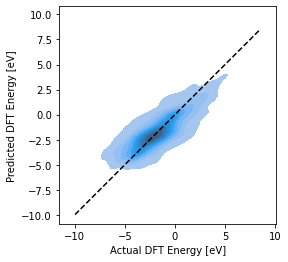

The mean absolute error is 0.96 eV


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Build a random forest regressor and fit it to the training data
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X_train, y_train)

# Plot predictions for val as a kdeplot
sns.kdeplot(
    y_val,
    regr.predict(X_val),
    fill=True,
)

# Add a parity line and x/y axis labels
plt.plot([np.min(y_val), np.max(y_val)], [np.min(y_val), np.max(y_val)], "k--")
plt.axis("square")
plt.xlabel("Actual DFT Energy [eV]")
plt.ylabel("Predicted DFT Energy [eV]")
plt.show()

from sklearn.metrics import mean_absolute_error
print(f'The mean absolute error is {mean_absolute_error(y_val, regr.predict(X_val)):.2f} eV')

This model works ok for predicting the DFT energies. There are many things you could try:
* Different models
* Predicting the difference between the expensive ML models and the DFT values (see challenges above)
* Other ways of featurizing the data (especially the bulk compositions)
* Building separate models for each adsorbate type
* ...

````{note}
The below information is not necessary for the project, but helps to explain the original dataset and the type of simulations and energies that are being calculated

````

## Dataset Overview and Details about Calculations



The Open Catalyst 2020 Dataset (OC20) will be used throughout this tutorial. More details can be found [here](https://github.com/Open-Catalyst-Project/ocp/blob/master/DATASET.md) and the corresponding [paper](https://arxiv.org/abs/2010.09990). Data is stored in PyTorch Geometric [Data](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html) objects and stored in LMDB files. For each task we include several sized training splits. Validation/Test splits are broken into several subsplits: In Domain (ID), Out of Domain Adsorbate (OOD-Ads), Out of Domain Catalyast (OOD-Cat) and Out of Domain Adsorbate and Catalyst (OOD-Both). Split sizes are summarized below:

Train
* S2EF - 200k, 2M, 20M, 134M(All)
* IS2RE/IS2RS - 10k, 100k, 460k(All)

Val/Test
* S2EF - ~1M across all subsplits
* IS2RE/IS2RS - ~25k across all splits


![OC20](./OC20.jpg)

## Data Visualization <a name="visual"></a>

In [6]:
import matplotlib

matplotlib.use("Agg")

import os

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

params = {
    "axes.labelsize": 14,
    "font.size": 14,
    "font.family": " DejaVu Sans",
    "legend.fontsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "axes.labelsize": 25,
    "axes.titlesize": 25,
    "text.usetex": False,
    "figure.figsize": [12, 12],
}
matplotlib.rcParams.update(params)


import ase.io
from ase import Atoms
from ase.build import add_adsorbate, fcc100, molecule
from ase.calculators.emt import EMT
from ase.constraints import FixAtoms
from ase.io import extxyz
from ase.io.trajectory import Trajectory
from ase.optimize import LBFGS
from ase.visualize.plot import plot_atoms
from IPython.display import Image

### Understanding the data
We use the Atomic Simulation Environment (ASE) library to interact with our data. This notebook will provide you with some intuition on how atomic data is generated, how the data is structured, how to visualize the data, and the specific properties that are passed on to our models.

### Generating sample data

The OC20 dataset was generated using density functional theory (DFT), a quantum chemistry method for modeling atomistic environments. For more details, please see our dataset paper.  In this notebook, we generate sample data in the same format as the OC20 dataset; however, we use a faster method that is less accurate called effective-medium theory (EMT) because our DFT calculations are too computationally expensive to run here. EMT is great for demonstration purposes but not accurate enough for our actual catalysis applications. Below is a structural relaxation of a catalyst system, a propane (C3H8) adsorbate on a copper (Cu) surface. Throughout this tutorial a surface may be referred to as a slab and the combination of an adsorbate and a surface as an adslab.

### Structural relaxations

A structural relaxation or structure optimization is the process of iteratively updating atom positions to find the atom positions that minimize the energy of the structure. Standard optimization methods are used in structural relaxations — below we use the Limited-Memory Broyden–Fletcher–Goldfarb–Shanno (LBFGS) algorithm. The step number, time, energy, and force max are printed at each optimization step. Each step is considered one example because it provides all the information we need to train models for the S2EF task and the entire set of steps is referred to as a trajectory. Visualizing intermediate structures or viewing the entire trajectory can be illuminating to understand what is physically happening and to look for problems in the simulation, especially when we run ML-driven relaxations. Common problems one may look out for - atoms excessively overlapping/colliding with each other and atoms flying off into random directions.

In [7]:
###DATA GENERATION - FEEL FREE TO SKIP###

# This cell sets up and runs a structural relaxation
# of a propane (C3H8) adsorbate on a copper (Cu) surface

adslab = fcc100("Cu", size=(3, 3, 3))
adsorbate = molecule("C3H8")
add_adsorbate(adslab, adsorbate, 3, offset=(1, 1))  # adslab = adsorbate + slab

# tag all slab atoms below surface as 0, surface as 1, adsorbate as 2
tags = np.zeros(len(adslab))
tags[18:27] = 1
tags[27:] = 2

adslab.set_tags(tags)

# Fixed atoms are prevented from moving during a structure relaxation.
# We fix all slab atoms beneath the surface.
cons = FixAtoms(indices=[atom.index for atom in adslab if (atom.tag == 0)])
adslab.set_constraint(cons)
adslab.center(vacuum=13.0, axis=2)
adslab.set_pbc(True)
adslab.set_calculator(EMT())

os.makedirs("data", exist_ok=True)

# Define structure optimizer - LBFGS. Run for 100 steps,
# or if the max force on all atoms (fmax) is below 0 ev/A.
# fmax is typically set to 0.01-0.05 eV/A,
# for this demo however we run for the full 100 steps.

dyn = LBFGS(adslab, trajectory="data/toy_c3h8_relax.traj")
dyn.run(fmax=0, steps=100)

traj = ase.io.read("data/toy_c3h8_relax.traj", ":")

# convert traj format to extxyz format (used by OC20 dataset)
columns = ["symbols", "positions", "move_mask", "tags"]
with open("data/toy_c3h8_relax.extxyz", "w") as f:
    extxyz.write_xyz(f, traj, columns=columns)

       Step     Time          Energy         fmax
*Force-consistent energies used in optimization.
LBFGS:    0 11:32:35       15.804700*       6.7764


LBFGS:    1 11:32:35       12.190607*       4.3232


LBFGS:    2 11:32:35       10.240169*       2.2655


LBFGS:    3 11:32:35        9.779223*       0.9372


LBFGS:    4 11:32:35        9.671525*       0.7702


LBFGS:    5 11:32:35        9.574461*       0.6635


LBFGS:    6 11:32:35        9.537502*       0.5718


LBFGS:    7 11:32:35        9.516673*       0.4466


LBFGS:    8 11:32:35        9.481330*       0.4611


LBFGS:    9 11:32:35        9.462255*       0.2931


LBFGS:   10 11:32:35        9.448937*       0.2490


LBFGS:   11 11:32:35        9.433813*       0.2371


LBFGS:   12 11:32:35        9.418884*       0.2602


LBFGS:   13 11:32:35        9.409649*       0.2532


LBFGS:   14 11:32:35        9.404838*       0.1624


LBFGS:   15 11:32:35        9.401753*       0.1823


LBFGS:   16 11:32:35        9.397314*       0.2592


LBFGS:   17 11:32:35        9.387947*       0.3450


LBFGS:   18 11:32:35        9.370825*       0.4070


LBFGS:   19 11:32:35        9.342222*       0.4333


LBFGS:   20 11:32:35        9.286822*       0.5002


LBFGS:   21 11:32:36        9.249910*       0.5241


LBFGS:   22 11:32:36        9.187179*       0.5120


LBFGS:   23 11:32:36        9.124811*       0.5718


LBFGS:   24 11:32:36        9.066185*       0.5409


LBFGS:   25 11:32:36        9.000116*       1.0798


LBFGS:   26 11:32:36        8.893632*       0.7528


LBFGS:   27 11:32:36        8.845939*       0.3321


LBFGS:   28 11:32:36        8.815173*       0.2512


LBFGS:   29 11:32:36        8.808721*       0.2143


LBFGS:   30 11:32:36        8.794643*       0.1546


LBFGS:   31 11:32:36        8.789162*       0.2014


LBFGS:   32 11:32:36        8.782320*       0.1755


LBFGS:   33 11:32:36        8.780394*       0.1037


LBFGS:   34 11:32:36        8.778410*       0.1076


LBFGS:   35 11:32:36        8.775079*       0.1797


LBFGS:   36 11:32:36        8.766987*       0.3334


LBFGS:   37 11:32:36        8.750249*       0.5307


LBFGS:   38 11:32:36        8.725928*       0.6851


LBFGS:   39 11:32:36        8.702312*       0.5823


LBFGS:   40 11:32:36        8.661515*       0.3996


LBFGS:   41 11:32:37        8.643432*       0.5585


LBFGS:   42 11:32:37        8.621201*       0.3673


LBFGS:   43 11:32:37        8.614414*       0.1394


LBFGS:   44 11:32:37        8.610785*       0.1372


LBFGS:   45 11:32:37        8.608134*       0.1464


LBFGS:   46 11:32:37        8.604928*       0.1196


LBFGS:   47 11:32:37        8.599151*       0.1354


LBFGS:   48 11:32:37        8.594063*       0.1479


LBFGS:   49 11:32:37        8.589493*       0.1538


LBFGS:   50 11:32:37        8.587274*       0.0885


LBFGS:   51 11:32:37        8.584633*       0.0938


LBFGS:   52 11:32:37        8.580239*       0.1409


LBFGS:   53 11:32:37        8.572938*       0.2543


LBFGS:   54 11:32:37        8.563343*       0.2919


LBFGS:   55 11:32:37        8.554117*       0.1966


LBFGS:   56 11:32:37        8.547597*       0.1291


LBFGS:   57 11:32:37        8.542086*       0.1280


LBFGS:   58 11:32:37        8.535432*       0.0982


LBFGS:   59 11:32:37        8.533622*       0.1277


LBFGS:   60 11:32:37        8.527487*       0.1167


LBFGS:   61 11:32:38        8.523863*       0.1218


LBFGS:   62 11:32:38        8.519229*       0.1305


LBFGS:   63 11:32:38        8.515424*       0.1019


LBFGS:   64 11:32:38        8.511240*       0.2122


LBFGS:   65 11:32:38        8.507967*       0.2666


LBFGS:   66 11:32:38        8.503903*       0.2377


LBFGS:   67 11:32:38        8.497575*       0.1623


LBFGS:   68 11:32:38        8.485434*       0.2022


LBFGS:   69 11:32:38        8.466738*       0.2159


LBFGS:   70 11:32:38        8.467607*       0.3348


LBFGS:   71 11:32:38        8.454037*       0.1063


LBFGS:   72 11:32:38        8.448980*       0.1197


LBFGS:   73 11:32:38        8.446550*       0.0992


LBFGS:   74 11:32:38        8.444705*       0.0562


LBFGS:   75 11:32:38        8.443403*       0.0388


LBFGS:   76 11:32:38        8.442646*       0.0548


LBFGS:   77 11:32:38        8.442114*       0.0614


LBFGS:   78 11:32:38        8.440960*       0.0588


LBFGS:   79 11:32:38        8.439820*       0.0482


LBFGS:   80 11:32:38        8.438600*       0.0513


LBFGS:   81 11:32:39        8.437429*       0.0541


LBFGS:   82 11:32:39        8.435695*       0.0672


LBFGS:   83 11:32:39        8.431957*       0.0857


LBFGS:   84 11:32:39        8.423485*       0.1332


LBFGS:   85 11:32:39        8.413846*       0.2078


LBFGS:   86 11:32:39        8.404849*       0.1787


LBFGS:   87 11:32:39        8.385339*       0.1690


LBFGS:   88 11:32:39        8.386849*       0.1876


LBFGS:   89 11:32:39        8.371078*       0.1181


LBFGS:   90 11:32:39        8.368801*       0.0942


LBFGS:   91 11:32:39        8.366226*       0.0670


LBFGS:   92 11:32:39        8.361680*       0.0550


LBFGS:   93 11:32:39        8.360631*       0.0473


LBFGS:   94 11:32:39        8.359692*       0.0242


LBFGS:   95 11:32:39        8.359361*       0.0155


LBFGS:   96 11:32:39        8.359163*       0.0143


LBFGS:   97 11:32:39        8.359102*       0.0156


LBFGS:   98 11:32:39        8.359048*       0.0155


LBFGS:   99 11:32:39        8.358986*       0.0142


LBFGS:  100 11:32:40        8.358921*       0.0132


/opt/conda/lib/python3.9/site-packages/ase/io/extxyz.py:302: UserWarning: Skipping unhashable information adsorbate_info
  warnings.warn('Skipping unhashable information '


### Reading a trajectory

In [8]:
identifier = "toy_c3h8_relax.extxyz"

# the `index` argument corresponds to what frame of the trajectory to read in, specifiying ":" reads in the full trajectory.
traj = ase.io.read(f"data/{identifier}", index=":")

### Viewing a trajectory

Below we visualize the initial, middle, and final steps in the structural relaxation trajectory from above. Copper atoms in the surface are colored orange, the propane adsorbate on the surface has grey colored carbon atoms and white colored hydrogen atoms. The adsorbate’s structure changes during the simulation and you can see how it relaxes on the surface. In this case, the relaxation looks normal; however, there can be instances where the adsorbate flies away (desorbs) from the surface or the adsorbate can break apart (dissociation), which are hard to detect without visualization. Additionally, visualizations can be used as a quick sanity check to ensure the initial system is set up correctly and there are no major issues with the simulation.

<AxesSubplot:title={'center':'final'}>

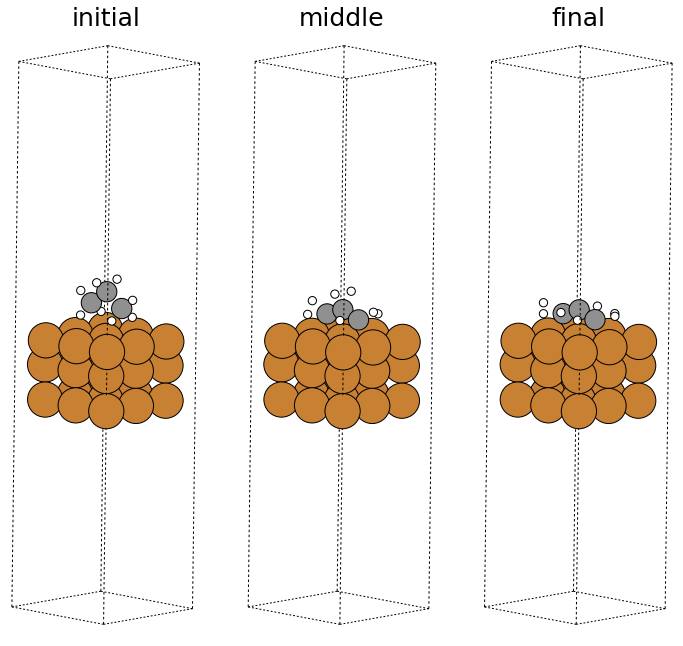

In [9]:
fig, ax = plt.subplots(1, 3)
labels = ["initial", "middle", "final"]
for i in range(3):
    ax[i].axis("off")
    ax[i].set_title(labels[i])
ase.visualize.plot.plot_atoms(traj[0], ax[0], radii=0.8, rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[50], ax[1], radii=0.8, rotation=("-75x, 45y, 10z"))
ase.visualize.plot.plot_atoms(traj[-1], ax[2], radii=0.8, rotation=("-75x, 45y, 10z"))

### Data contents <a name="contents"></a>

Here we take a closer look at what information is contained within these trajectories.

In [10]:
i_structure = traj[0]
i_structure

Atoms(symbols='Cu27C3H8', pbc=True, cell=[7.65796644025031, 7.65796644025031, 33.266996999999996], energies=..., forces=..., tags=..., constraint=FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]), calculator=SinglePointCalculator(...))

#### Atomic numbers

In [11]:
numbers = i_structure.get_atomic_numbers()
print(numbers)

[29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29  6  6  6  1  1  1  1  1  1  1  1]


#### Atomic symbols

In [12]:
symbols = np.array(i_structure.get_chemical_symbols())
print(symbols)

['Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu'
 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'Cu' 'C' 'C'
 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H']


#### Unit cell

The unit cell is the volume containing our system of interest. Express as a 3x3 array representing the directional vectors that make up the volume. Illustrated as the dashed box in the above visuals.

In [13]:
cell = np.array(i_structure.cell)
print(cell)

[[ 7.65796644  0.          0.        ]
 [ 0.          7.65796644  0.        ]
 [ 0.          0.         33.266997  ]]


#### Periodic boundary conditions (PBC)

x,y,z boolean representing whether a unit cell repeats in the corresponding directions. The OC20 dataset sets this to [True, True, True], with a large enough vacuum layer above the surface such that a unit cell does not see itself in the z direction. Although the original structure shown above is what get's passed into our models, the presence of PBC allows it to effectively repeat infinitely in the x and y directions. Below we visualize the same structure with a periodicity of 2 in all directions, what the model may effectively see.

In [14]:
pbc = i_structure.pbc
print(pbc)

[ True  True  True]


<AxesSubplot:title={'center':'final'}>

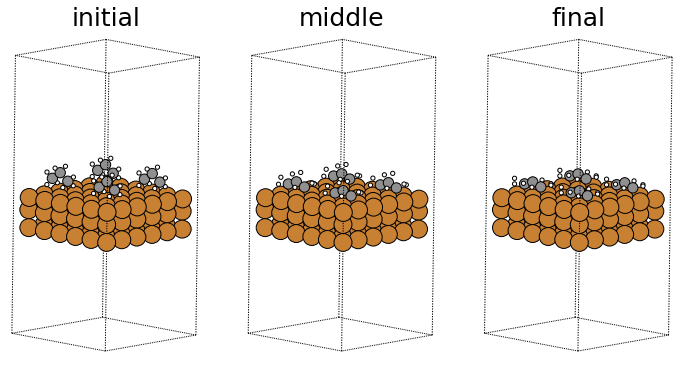

In [15]:
fig, ax = plt.subplots(1, 3)
labels = ["initial", "middle", "final"]
for i in range(3):
    ax[i].axis("off")
    ax[i].set_title(labels[i])

ase.visualize.plot.plot_atoms(
    traj[0].repeat((2, 2, 1)), ax[0], radii=0.8, rotation=("-75x, 45y, 10z")
)
ase.visualize.plot.plot_atoms(
    traj[50].repeat((2, 2, 1)), ax[1], radii=0.8, rotation=("-75x, 45y, 10z")
)
ase.visualize.plot.plot_atoms(
    traj[-1].repeat((2, 2, 1)), ax[2], radii=0.8, rotation=("-75x, 45y, 10z")
)

#### Tags

The OC20 dataset consists of systems with several different types of atoms. To help with identifying the index of certain atoms, we tag each atom according to where it is found in the system. There are three categories of atoms: 
- *sub-surface slab atoms*: these are atoms in the bottom layers of the catalyst, furthest away from the adsorbate
- *surface slab atoms*: these are atoms in the top layers of the catalyst, close to where the adsorbate will be placed   
- *adsorbate atoms*: atoms that make up the adsorbate molecule on top of the catalyst.

Tag:

0 - Sub-surface slab atoms

1 - Surface slab atoms

2 - Adsorbate atoms

In [16]:
tags = i_structure.get_tags()
print(tags)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2]


#### Fixed atoms constraint

In reality, surfaces contain many, many more atoms beneath what we've illustrated as the surface. At an infinite depth, these subsurface atoms would look just like the bulk structure. We approximate a true surface by fixing the subsurface atoms into their “bulk” locations. This ensures that they cannot move at the “bottom” of the surface. If they could, this would throw off our calculations. Consistent with the above, we fix all atoms with tags=0, and denote them as "fixed". All other atoms are considered "free".

In [17]:
cons = i_structure.constraints[0]
print(cons, "\n")

# indices of fixed atoms
indices = cons.index
print(indices, "\n")

# fixed atoms correspond to tags = 0
print(tags[indices])

FixAtoms(indices=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Adsorption energy

The energy of the system is one of the properties of interest in the OC20 dataset. It's important to note that absolute energies provide little value to researchers and must be referenced properly to be useful. The OC20 dataset references all it's energies to the bare slab + gas references to arrive at adsorption energies. Adsorption energies are important in studying catalysts and their corresponding reaction rates. In addition to the structure relaxations of the OC20 dataset, bare slab and gas (N2, H2, H2O, CO) relaxations were carried out with DFT in order to calculate adsorption energies.

In [18]:
final_structure = traj[-1]
relaxed_energy = final_structure.get_potential_energy()
print(f"Relaxed absolute energy = {relaxed_energy} eV")

# Corresponding raw slab used in original adslab (adsorbate+slab) system.
raw_slab = fcc100("Cu", size=(3, 3, 3))
raw_slab.set_calculator(EMT())
raw_slab_energy = raw_slab.get_potential_energy()
print(f"Raw slab energy = {raw_slab_energy} eV")


adsorbate = Atoms("C3H8").get_chemical_symbols()
# For clarity, we define arbitrary gas reference energies here.
# A more detailed discussion of these calculations can be found in the corresponding paper's SI.
gas_reference_energies = {"H": 0.3, "O": 0.45, "C": 0.35, "N": 0.50}

adsorbate_reference_energy = 0
for ads in adsorbate:
    adsorbate_reference_energy += gas_reference_energies[ads]

print(f"Adsorbate reference energy = {adsorbate_reference_energy} eV\n")

adsorption_energy = relaxed_energy - raw_slab_energy - adsorbate_reference_energy
print(f"Adsorption energy: {adsorption_energy} eV")

Relaxed absolute energy = 8.358921451406472 eV
Raw slab energy = 8.127167122751231 eV
Adsorbate reference energy = 3.4499999999999993 eV

Adsorption energy: -3.218245671344759 eV


#### Plot energy profile of toy trajectory

Plotting the energy profile of our trajectory is a good way to ensure nothing strange has occured. We expect to see a decreasing monotonic function. If the energy is consistently increasing or there's multiple large spikes this could be a sign of some issues in the optimization. This is particularly useful for when analyzing ML-driven relaxations and whether they make general physical sense.

Text(0, 0.5, 'Energy, eV')

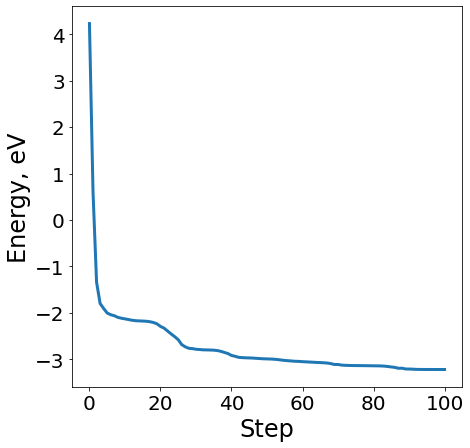

In [19]:
energies = [
    image.get_potential_energy() - raw_slab_energy - adsorbate_reference_energy
    for image in traj
]

plt.figure(figsize=(7, 7))
plt.plot(range(len(energies)), energies, lw=3)
plt.xlabel("Step", fontsize=24)
plt.ylabel("Energy, eV", fontsize=24)

#### Force

Forces are another important property of the OC20 dataset. Unlike datasets like QM9 which contain only ground state properties, the OC20 dataset contains per-atom forces necessary to carry out atomistic simulations. Physically, forces are the negative gradient of energy w.r.t atomic positions: $F = -\frac{dE}{dx}$. Although not mandatory (depending on the application), maintaining this energy-force consistency is important for models that seek to make predictions on both properties.

The "apply_constraint" argument controls whether to apply system constraints to the forces. In the OC20 dataset, this controls whether to return forces for fixed atoms (apply_constraint=False) or return 0s (apply_constraint=True).

In [20]:
# Returning forces for all atoms - regardless of whether "fixed" or "free"
i_structure.get_forces(apply_constraint=False)

array([[-1.07900000e-05, -3.80000000e-06,  1.13560540e-01],
       [-0.00000000e+00, -4.29200000e-05,  1.13302410e-01],
       [ 1.07900000e-05, -3.80000000e-06,  1.13560540e-01],
       [-1.84600000e-05,  0.00000000e+00,  1.13543430e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.13047800e-01],
       [ 1.84600000e-05,  0.00000000e+00,  1.13543430e-01],
       [-1.07900000e-05,  3.80000000e-06,  1.13560540e-01],
       [-0.00000000e+00,  4.29200000e-05,  1.13302410e-01],
       [ 1.07900000e-05,  3.80000000e-06,  1.13560540e-01],
       [-1.10430500e-02, -2.53094000e-03, -4.84573700e-02],
       [ 1.10430500e-02, -2.53094000e-03, -4.84573700e-02],
       [ 0.00000000e+00, -2.20890000e-04, -2.07827000e-03],
       [-1.10430500e-02,  2.53094000e-03, -4.84573700e-02],
       [ 1.10430500e-02,  2.53094000e-03, -4.84573700e-02],
       [-0.00000000e+00,  2.20890000e-04, -2.07827000e-03],
       [-3.49808000e-03, -0.00000000e+00, -7.85544000e-03],
       [ 3.49808000e-03, -0.00000000e+00

In [21]:
# Applying the fixed atoms constraint to the forces
i_structure.get_forces(apply_constraint=True)

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.31814437, -0.23642045, -0.39708923],
       [ 0.        , -2.18895316, -2.74768262],
       [ 0.31814437, -0.23642045, -0.397

###  Limitations
The OpenCatalyst project is motivated by the problems we face due to climate change, many of which require innovative solutions to reduce energy usage and replace traditional chemical feedstocks with renewable alternatives. For example, one of the most energy intensive chemical processes is the development of new electrochemical catalysts for ammonia fertilizer production that helped to feed the world’s growing population during the 20th century. This is also an illustrative example of possible unintended consequences as advancements in chemistry and materials may be used for numerous purposes. As ammonia fertilization increased in use, its overuse in today’s farming has led to ocean “dead zones” and its production is very carbon intensive. Knowledge and techniques used to create ammonia were also transferred to the creation of explosives during wartime. We hope to steer the use of ML for atomic simulations to societally-beneficial uses by training and testing our approaches on datasets, such as OC20, that were specifically designed to address chemical reactions useful for addressing climate change.4

### Next Steps for State of the Art in Catalyst Simulation Modeling

While progress has been well underway - https://opencatalystproject.org/leaderboard.html, a considerable gap still exists between state-of-the-art models and our target goals. We offer some some general thoughts as to next steps for the readers to ponder on or explore:

* GNN depth has consistenly improved model performance. What limitations to depth are there? How far can we push deeper models for OC20? 
* Our best performing models have little to no physical biases encoded. Can we incorporate such biases to improve our models? Experiments with physically inspired embeddings have had no advantage vs. random initializations, are there better ways to incorporate this information into the models?
* Uncertainty estimation will play an important role in later stages of the project when it comes to large scale screening. How can we get reliable uncertainty estimates from large scale GNNs?
* Are we limited to message-passing GNNs? Can we leverage alternative architectures for similiar or better performance?
* Trajectories are nothing more than sequential data points. How can we use sequential modeling techniques to model the full trajectory?

OC20 is a large and diverse dataset with many splits. For those with limited resources but unsure where to start, we provide some general recommendations:

* The IS2RE-direct task is a great place to start. With the largest training set containing ~460k data points, this task is easily accesible for those with even just a single GPU.
* Those interested in the more general S2EF task don't need to train on the All set to get meaningful performance.
    * Results on the 2M dataset are often sufficient to highlight model improvements.
    * For a fixed compute budget (e.g. fixed number of steps), training on the All set often leads to better performance.
* The S2EF 200k dataset is fairly noisy, trying to find meaningful trends using this dataset can be difficult.